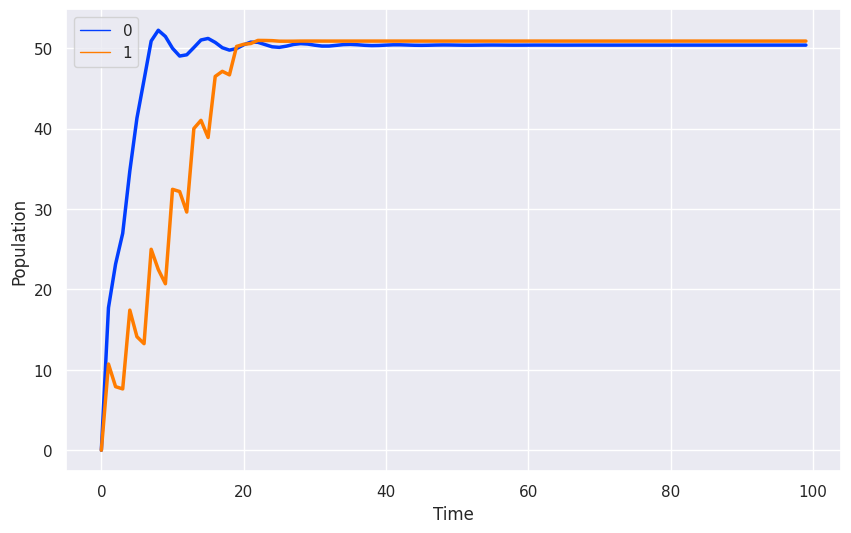

In [28]:
# Given a population where beta is how many children per adults every offspring, 
# and children don't dies, children became adults after 3 years.

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
N = 1 # initial population
t = 100 # time units: 1 time unit is 1 year


beta = 2
deaths = 0.9

K = 25 # Ratio of occupancy
# Suggestion use more variables for children at 1 step, second step, 
# Lets give children state, 1: Children, 2: Adolescence, 3:Adults, 

# time to become adults
# every children grow to the next step every year.


def population(N, t, beta, deaths, K, children_s0, children_s1, children_s2):

    Nt = np.zeros(t)
    Ntot = np.zeros(t)
    Nt[0] = N
    Ntot[0] = 0
    
    CarryingCapacity = True
    
    # Use different variable for children and adults
    # Use a systems of equations to solve the problem
    # Rule: after an epoch t, children_s1 becomes children_s2, children_s2 become adults
    # Adults generate children of current epoch as children_s0, 
    # prev step children_s1 becomes s2, prev step s2 becomes adults
    
    # Loop for adults
    for i in range(1,t):
        
        # Population growth: adults + children
        
        # Modelling carrying capacity in the environment we add K
        # K is the maximum population the environment can support
        # The birth rate is modulated by Nt/K
        if CarryingCapacity:   
            children_s0 =  beta*Nt[i-1]*(1-Nt[i-1]/K)
        else:     
            children_s0 =  beta*Nt[i-1]
        
        # Population growth: adults
        Nt[i] = Nt[i-1]+children_s2 - (deaths)*Nt[i-1]
   
        Ntot[i] = (Nt[i-1] + children_s0 + children_s1 + children_s2)


        children_s2 = children_s1
        
        children_s1 = children_s0
        
        if False:
            print("Total population at step", i, "are", Ntot[i])
            print("\n")
         
    return Ntot

def plot_populations(Nt):
    """ 
    Plot different populations
    Nt is a lsit of populations to plot
    """
    plt.figure(figsize=(10,6))
    for i in range(len(Nt)):
        plt.plot(Nt[i])

    plt.legend(['Nt', 'Nt2', 'Nt3', 'Nt4', 'Nt5', 'Nt6'])
    
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.show()

def plot_populations_seaborne(Nt):
    """ 
    Plot different populations
    Nt is a lsit of populations to plot
    """

    #Only with seaborn
    
    sns.set_theme(style="darkgrid")
    
    plt.figure(figsize=(10,6))
    # Change resolution of the plot
    sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 1})
    sns.lineplot(data=Nt, palette="bright", linewidth=2.5, dashes=False)
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.show()


def evaluate_equilibrium(N, t, beta, deaths, K, children_s0, children_s1, children_s2):
        """ To get the population equilibrium set Nt+1 = Nt """
    
    

Nt = population(N, t, beta, deaths, K, 0, 0, 0)
Nt2 = population(2, t, beta, 0.9, 40, 0 ,0, 0)
Nt3 = population(2, t, 1, 0.2, 40, 0, 0, 0)
Nt4 = population(2, t, 1.5, 0.9, 40, 0, 0, 0)
Nt5 = population(3, t, 1, 1, 50, 0, 0, 0)
Nt6 = population(25, t, 0.2, 0.3, 50, 0, 0, 0)
#Nt7 = population()


Nt7 = population(4, t, beta, 0.7, 25, 2,3,4)
Nt8 = population(4, t, beta, 0.9, 25, 0,0,0)

#plot_populations_seaborne([Nt, Nt2, Nt3, Nt4, Nt5, Nt6])
plot_populations_seaborne([Nt7, Nt8])


# To evaluate the equilibrium values we can do analitically this way

At equlibrium we have that

$ \red{N_{t+1} = N_t}$

So we can rewrite $N_t$ as

$$
N_t = \frac{\beta}{1 - \alpha_d}
$$

# How do we get ours equlibrium values?

Our system of recurrence equations is:

$$
\begin{align}
\begin{cases}
A_{t} &= A_{t-1} + C_{t-1}^{(2)} - (death\_rate \times A_{t-1}) \\ 
C_{t}^{(0)} &= \beta A_{t-1} \\
C_{t}^{(1)} &= C_{t-1}^{(0)} \\ 
C_{t}^{(2)} &= C_{t-1}^{(1)}
\end{cases}
\end{align}
$$

where $A_t$ are the Adults at epoch $t$, $C_t^{(0)}$ are children new born at time $t$, $C_t^{(1)}$ are children at age 1 at time $t$, $C_t^{(2)}$ are children at age 2 at time $t$.